In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.txt to train.txt


# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file=pd.read_csv('train.txt', sep="\t") 

In [ ]:
file.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1


In [ ]:
file=file.drop(columns='humor_rating')
file=file.drop(columns='humor_controversy')
file=file.drop(columns='offense_rating')
file=file.drop(columns='id')
print('File length',len(file))

File length 8000


In [ ]:
from sklearn.preprocessing import LabelEncoder
file['labels']=LabelEncoder().fit_transform(file['is_humor'])
file=file.drop(columns='is_humor')
file

,text,labels
0,TENNESSEE: We're the best state. Nobody even c...,1
1,A man inserted an advertisement in the classif...,1
2,How many men does it take to open a can of bee...,1
3,Told my mom I hit 1200 Twitter followers. She ...,1
4,Roses are dead. Love is fake. Weddings are bas...,1
...,...,...
7995,Lack of awareness of the pervasiveness of raci...,0
7996,Why are aspirins white? Because they work sorry,1
7997,"Today, we Americans celebrate our independence...",1
7998,How to keep the flies off the bride at an Ital...,1


In [ ]:
import collections
counter=collections.Counter(file['labels'])
print(counter)
#file['labels'].value_counts().plot(kind='bar')

Counter({1: 4932, 0: 3068})


# Data transformation

In [ ]:
file['text'] = file['text'].values.tolist()
print(file['text'])

0       TENNESSEE: We're the best state. Nobody even c...
1       A man inserted an advertisement in the classif...
2       How many men does it take to open a can of bee...
3       Told my mom I hit 1200 Twitter followers. She ...
4       Roses are dead. Love is fake. Weddings are bas...
                              ...                        
7995    Lack of awareness of the pervasiveness of raci...
7996      Why are aspirins white? Because they work sorry
7997    Today, we Americans celebrate our independence...
7998    How to keep the flies off the bride at an Ital...
7999    "Each ounce of sunflower seeds gives you 37% o...
Name: text, Length: 8000, dtype: object


In [ ]:
file['labels'] = file['labels'].values.tolist()

In [ ]:
file['labels']

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    1
7997    1
7998    1
7999    0
Name: labels, Length: 8000, dtype: int64

# Tokenization (p 183)

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(file['text'])
sequences = tokenizer.texts_to_sequences(file['text'])       #[[278, 1, 136, 560, 677, 148, 272, 561, 449, 91, 1, 346, 259, 408], [2, 80, 43, 8, 1, 55, 242, 1,
one_hot_encoded = tokenizer.texts_to_matrix(file['text'], mode='binary') # array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  (1k values)
word_index = tokenizer.word_index                            #{'the': 1, 'a': 2, 'to': 3, 'i': 4, 'you': 5, 'and': 6, 'of': 7,

In [ ]:
#tokenizer

In [ ]:
#print(sequences)

In [ ]:
#one_hot_encoded

In [ ]:
#one_hot_encoded.shape

In [ ]:
#print(word_index)

In [ ]:
one_hot_encoded.shape

(8000, 10000)

In [ ]:
y=file['labels']

#Split train test

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

xtrain, xremaining, ytrain, yremaining = train_test_split(one_hot_encoded,y, train_size=0.6)
xval, xtest, yval, ytest = train_test_split(xremaining, yremaining, test_size=0.5)
print('xtrain',len(xtrain), 'ytrain',len(ytrain),'xval', len(xval),'yval', len(yval),'xtest', len(xtest),'ytest', len(ytest))

xtrain 4800 ytrain 4800 xval 1600 yval 1600 xtest 1600 ytest 1600


- xtrain..ytrain 4800 4800
- xval.....yval...1600 1600
- xtest...ytest..1600 1600 

#model definition p 72

In [ ]:
tf.random.set_seed(11)

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
#model.add((layers.Dropout(0.9)))

model.add(layers.Dense(1, activation='sigmoid'))

#Training the model p 74

In [ ]:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(xtrain,
                    ytrain, 
                    epochs=100,
                    batch_size=512,
                    validation_data=(xval, yval))

Epoch 1/100
10/10 [==============================] - 3s 50ms/step - loss: 0.6287 - acc: 0.6569 - val_loss: 0.5413 - val_acc: 0.7881
Epoch 2/100
10/10 [==============================] - 0s 24ms/step - loss: 0.4447 - acc: 0.8673 - val_loss: 0.4259 - val_acc: 0.8294
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.3067 - acc: 0.9119 - val_loss: 0.3689 - val_acc: 0.8438
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2229 - acc: 0.9400 - val_loss: 0.3596 - val_acc: 0.8413
Epoch 5/100
10/10 [==============================] - 0s 24ms/step - loss: 0.1672 - acc: 0.9565 - val_loss: 0.3431 - val_acc: 0.8525
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.1260 - acc: 0.9694 - val_loss: 0.3513 - val_acc: 0.8512
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 0.0951 - acc: 0.9775 - val_loss: 0.3693 - val_acc: 0.8444
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 0.

# Plotting training and validation loss p 74

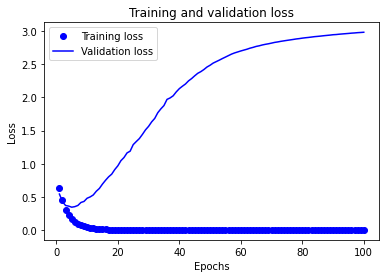

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict['acc'] # is this line missing from the book by mistake? check

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

the optimal numer of epochs is around 25, 
check https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

#Plotting training and validation accuracy p 75

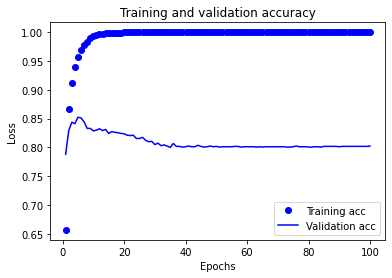

In [ ]:
plt.clf()
acc_values = history_dict['acc']

val_acc = history_dict['val_acc'] #CHECK THE CORRECTION. IN THE BOOK THERE MUST BE A MISTAKE

#val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Test the model on the testset

Epoch 1/4
75/75 [==============================] - 2s 14ms/step - loss: 0.5859 - acc: 0.6927 - val_loss: 0.4695 - val_acc: 0.8238
Epoch 2/4
75/75 [==============================] - 1s 9ms/step - loss: 0.4114 - acc: 0.8308 - val_loss: 0.3619 - val_acc: 0.8544
Epoch 3/4
75/75 [==============================] - 1s 10ms/step - loss: 0.3079 - acc: 0.8850 - val_loss: 0.3238 - val_acc: 0.8706
Epoch 4/4
75/75 [==============================] - 1s 12ms/step - loss: 0.2340 - acc: 0.9192 - val_loss: 0.3303 - val_acc: 0.8719


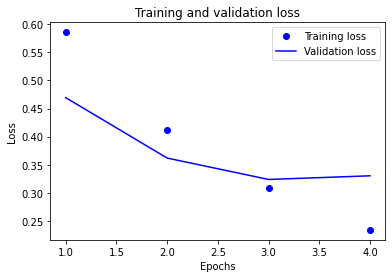

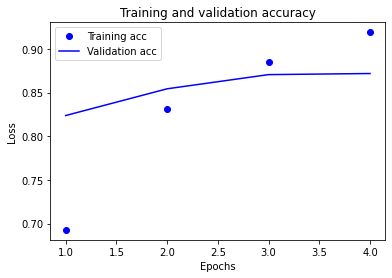

In [ ]:
#CREATE MODEL FOR TEST 
tf.random.set_seed(11)

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add((layers.Dropout(0.5)))
model.add(layers.Dense(1, activation='sigmoid'))

#COMPILE AND RUN THE MODEL ON THE TEST
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(xtrain,
                    ytrain, 
                    epochs=4,
                    batch_size=64,
                    validation_data=(xtest, ytest))

#PLOT THE TEST LOSS
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc'] # is this line missing from the book by mistake? check
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#PLOT THE TEST VALIDATION
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc'] #CHECK THE CORRECTION. IN THE BOOK THERE MUST BE A MISTAKE
#val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Calculate the metrics


code from https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
tf.random.set_seed(11) 
 
# predict probabilities for test set
yhat_probs = model.predict(xtest, verbose=0)

# predict crisp classes for test set
yhat_classes = model.predict(xtest, verbose=0)
yhat_classes = np.where(yhat_classes > 0.5, 1, 0)
print(yhat_classes)

# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(ytest, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(ytest, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(ytest, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest, yhat_classes)
print('F1 score: %f' % f1)
 
# confusion matrix
matrix = confusion_matrix(ytest, yhat_classes)
print(matrix)

[[1]
 [1]
 [0]
 ...
 [1]
 [1]
 [1]]
Accuracy: 0.871875
Precision: 0.874401
Recall: 0.924949
F1 score: 0.898965
[[483 131]
 [ 74 912]]
